In [8]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import LocalOutlierFactor


df = pd.read_csv('./REF_Buchungen_2018.csv',sep=';',header=None, encoding='ISO-8859-1', low_memory=False) 

#df.rename({0: 'BereichsId', 1: 'KtoNr', 2:'Datum', 3:'BU_Schl', 4:'GKtoNr', 11:'Umsatz_S', 12:'Umsatz_H'}, axis=1, inplace=True) 
df.rename({0: 'KtoNr', 3:'Datum',6:'Umsatz_S', 7:'Umsatz_H'}, axis=1, inplace=True) 
 
df= df[['KtoNr', 'Datum', 'Umsatz_S', 'Umsatz_H']]

df['Umsatz_H'] = df['Umsatz_H'].str.replace(',','.')
df['Umsatz_H'] = pd.to_numeric(df['Umsatz_H'])

df['Umsatz_S'] = df['Umsatz_S'].str.replace(',','.')
df['Umsatz_S'] = pd.to_numeric(df['Umsatz_S'])
 


df_Umsaetze = df[((df['KtoNr'] >= 8000) & (df['KtoNr'] <= 8589)) | ((df['KtoNr'] >= 8900) & (df['KtoNr'] <= 8919)) | ((df['KtoNr'] >= 8940) & (df['KtoNr'] <= 8959)) |
      ((df['KtoNr'] >= 8700) & (df['KtoNr'] <= 8799))].copy()



df_Umsaetze = df_Umsaetze.drop(columns=['KtoNr'])
df_Umsaetze.head()



,Datum,Umsatz_S,Umsatz_H
64164,04.12.2018,0.00,14093.81
64165,04.12.2018,0.00,24019.27
64166,06.12.2018,26543.68,0.00
64167,06.12.2018,0.00,20714.57
64168,06.12.2018,0.00,26543.68


In [9]:
df_Umsaetze['Datum'] = pd.to_datetime(df_Umsaetze['Datum'],format='%d.%m.%Y')
df_Umsaetze.sort_values(by=['Datum'], inplace=True)

# Saldo berechnen
df_Umsaetze['Saldo'] = df.apply(lambda row: row.Umsatz_H - row.Umsatz_S, axis = 1) 
df_Umsaetze = df_Umsaetze.drop(columns=['Umsatz_S','Umsatz_H'])
df_Umsaetze.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751 entries, 67807 to 67188
Data columns (total 2 columns):
Datum    3751 non-null datetime64[ns]
Saldo    3751 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 87.9 KB


[1.6550000e+01 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.7006440e+04
 6.2445190e+04 1.0703982e+05 8.2418310e+04 0.0000000e+00 0.0000000e+00]


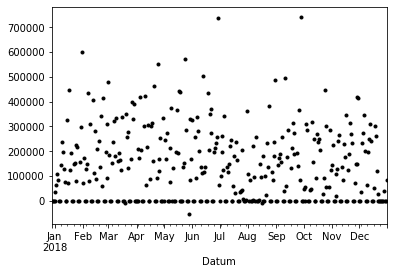

In [10]:
#Sortieren der Zahlen nach Datum
df_Umsaetze = df_Umsaetze.set_index(pd.DatetimeIndex(df_Umsaetze['Datum']))
df_Umsaetze = df_Umsaetze['Saldo'].resample("D").sum()

print(df_Umsaetze.values[0:10])
df_Umsaetze.plot(style='k.')


In [11]:
clf = LocalOutlierFactor(n_neighbors=20)

#Nötig für 1D Values
X = df_Umsaetze.values.reshape(-1,1)
pred = clf.fit_predict(X)

pred[0:10]




c:\python\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [12]:
X_scores = clf.negative_outlier_factor_

X_scores[0:20]

array([-1.65500000e+11, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.05122392e+00, -1.03069039e+00, -1.07344020e+00, -9.78044046e-01,
       -1.00000000e+00, -1.00000000e+00, -1.00335580e+00, -9.78562155e-01,
       -9.75441288e-01, -1.02530536e+00, -9.98837173e-01, -1.00000000e+00,
       -1.00000000e+00, -9.89401997e-01, -1.03917705e+00, -1.13590590e+00])

In [13]:
df_model = pd.DataFrame(df_Umsaetze.values, columns = ["umsaetze"])

df_model['scores'] = X_scores
df_model['anomaly'] = pred
df_model.head(20)


,umsaetze,scores,anomaly
0,16.55,-1.655000e+11,-1
1,0.00,-1.000000e+00,1
2,0.00,-1.000000e+00,1
3,0.00,-1.000000e+00,1
4,37006.44,-1.051224e+00,1
5,62445.19,-1.030690e+00,1
6,107039.82,-1.073440e+00,1
7,82418.31,-9.780440e-01,1
8,0.00,-1.000000e+00,1
9,0.00,-1.000000e+00,1


In [14]:
df_model.plot(style='k.', x='Umsaetze', y='Score')

KeyError: 'Umsaetze'